In [1]:
# Install necessary libraries from the requirements
# !pip install -r requirements.txt

# Import the necessary libraries
import pandas as pd
import numpy as np
import requests
from alpha_vantage.timeseries import TimeSeries
import yfinance as yf
from iexfinance.stocks import Stock
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import nltk
from bs4 import BeautifulSoup
from pytrends.request import TrendReq
import matplotlib.pyplot as plt

In [2]:
# DataFetcher class from data_fetcher.py
import pandas as pd
import numpy as np
import requests
from alpha_vantage.timeseries import TimeSeries
import yfinance as yf
from iexfinance.stocks import Stock

class DataFetcher:
    def __init__(self):
        self.alpha_vantage_api_key = "2XJY7S44R6Y5S31D"
        self.iex_api_key = "sk_50267f0882f141c8b5af23390382fb94"
        self.ts = TimeSeries(key=self.alpha_vantage_api_key, output_format='pandas')

    def fetch_stock_data(self, symbol):
        # Fetching data from Alpha Vantage
        data, meta_data = self.ts.get_daily(symbol=symbol, outputsize='full')
        data = data.sort_index()
        return data

In [3]:
# SignalGenerator class from signal_generator.py
import pandas as pd

class SignalGenerator:
    def generate_signals(self, data):
        data['Signal'] = 0
        data['Signal'][50:] = np.where(data['Close'][50:] > data['Close'].rolling(window=50).mean()[50:], 1, 0)
        return data

In [4]:
# TrendAnalysis class from trend_analysis.py
from pytrends.request import TrendReq
import pandas as pd

class TrendAnalysis:
    def __init__(self):
        self.pytrends = TrendReq(hl='en-US', tz=360)

    def analyze_trends(self, keyword):
        self.pytrends.build_payload([keyword], cat=0, timeframe='today 12-m', geo='', gprop='')
        data = self.pytrends.interest_over_time()
        return data

In [5]:
# PredictionModel class from prediction_model.py
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

class PredictionModel:
    def __init__(self):
        self.model = LinearRegression()

    def train(self, X, y):
        self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X)

In [6]:
# DecisionMaker class from decision_maker.py
class DecisionMaker:
    def make_decision(self, signals, predictions):
        # Example decision making based on signals and predictions
        decision = "Buy" if predictions[-1] > signals['Close'][-1] else "Sell"
        return decision

In [7]:
# Fetch Data
data_fetcher = DataFetcher()
stock_data = data_fetcher.fetch_stock_data("AAPL")
print("Stock Data Fetched:", stock_data.head())

Stock Data Fetched:             1. open  2. high  3. low  4. close  5. volume
date                                                     
1999-11-01    80.00    80.69   77.37     77.62  2487300.0
1999-11-02    78.00    81.69   77.31     80.25  3564600.0
1999-11-03    81.62    83.25   81.00     81.50  2932700.0
1999-11-04    82.06    85.37   80.62     83.62  3384700.0
1999-11-05    84.62    88.37   84.00     88.31  3721500.0


In [17]:
# Adjust column names to match the expected format
stock_data.columns = [col.split('. ')[1].capitalize() if '. ' in col else col.capitalize() for col in stock_data.columns]

# Verify the new column names
print("Adjusted column names in stock_data:", stock_data.columns)

# Generate Signals
signal_generator = SignalGenerator()
signals = signal_generator.generate_signals(stock_data)
print("Generated Signals:", signals.head())


Adjusted column names in stock_data: Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Signal'], dtype='object')
Generated Signals:              Open   High    Low  Close     Volume  Signal
date                                                     
1999-11-01  80.00  80.69  77.37  77.62  2487300.0       0
1999-11-02  78.00  81.69  77.31  80.25  3564600.0       0
1999-11-03  81.62  83.25  81.00  81.50  2932700.0       0
1999-11-04  82.06  85.37  80.62  83.62  3384700.0       0
1999-11-05  84.62  88.37  84.00  88.31  3721500.0       0


C:\Users\thasaidi\AppData\Local\Temp\ipykernel_49944\2483674489.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][50:] = np.where(data['Close'][50:] > data['Close'].rolling(window=50).mean()[50:], 1, 0)
C:\Users\thasaidi\App

In [9]:
# Trend Analysis
trend_analysis = TrendAnalysis()
trends = trend_analysis.analyze_trends("AAPL")
print("Trend Analysis Results:", trends.head())

Trend Analysis Results:             AAPL  isPartial
date                       
2023-05-14    44      False
2023-05-21    43      False
2023-05-28    48      False
2023-06-04    85      False
2023-06-11    59      False


c:\Source\gpt-pilot\workspace\TRADERS\traders_env\Lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


In [10]:
# Predictive Model
prediction_model = PredictionModel()
X_train, X_test, y_train, y_test = train_test_split(stock_data[['1. open', '2. high', '3. low', '5. volume']], stock_data['4. close'], test_size=0.2, random_state=42)
prediction_model.train(X_train, y_train)
predictions = prediction_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error of Predictions:", mse)

Mean Squared Error of Predictions: 1.9877523852671448


In [18]:
# Decision Making
decision_maker = DecisionMaker()
decision = decision_maker.make_decision(signals, predictions)
print("Investment Decision:", decision)

Investment Decision: Sell


C:\Users\thasaidi\AppData\Local\Temp\ipykernel_49944\1516951433.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  decision = "Buy" if predictions[-1] > signals['Close'][-1] else "Sell"


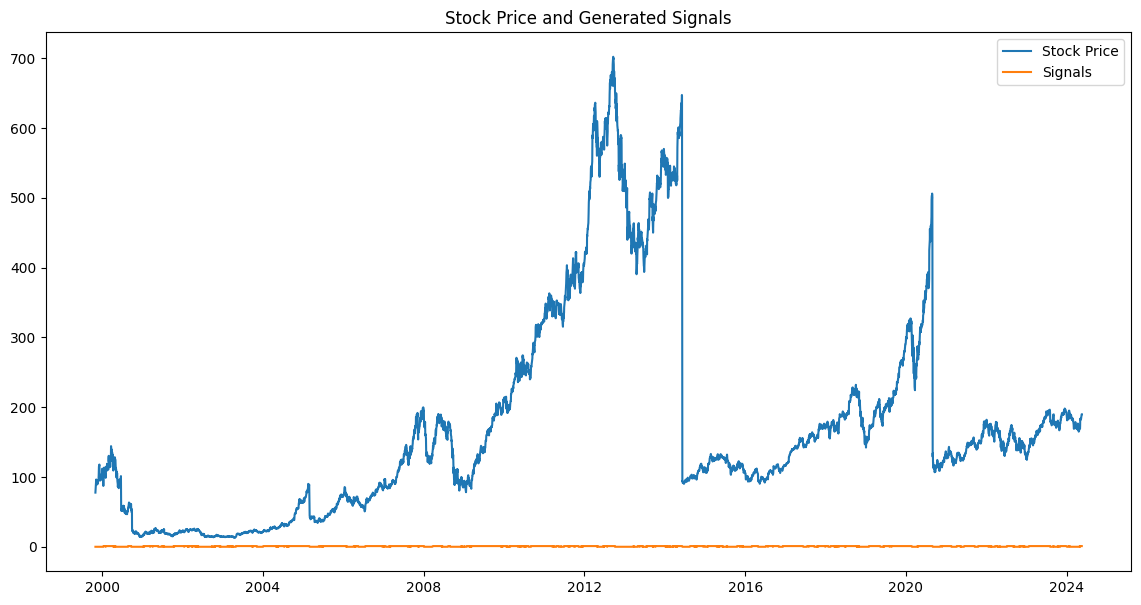

In [20]:
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'], label='Stock Price')
plt.plot(signals['Signal'], label='Signals')
plt.title('Stock Price and Generated Signals')
plt.legend()
plt.show()